# Making My Own KDE

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


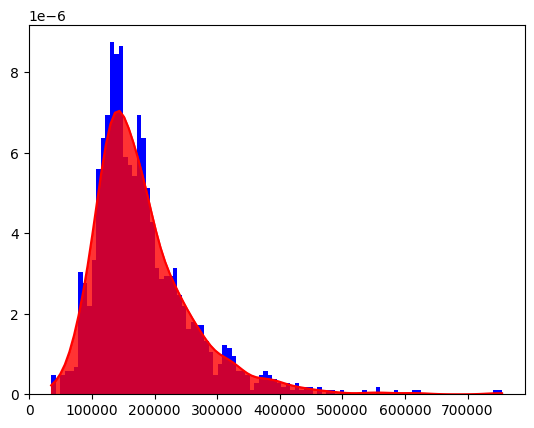

In [79]:
target =data["SalePrice"]

def generate_gaussian_kde(variable,h):
    def gaussian_kde(data_point):
        output = np.zeros_like(data_point)
        for i in range(len(data_point)):
            kernel_input = (data_point[i] - variable)/h
            kernel_output = 0.3989422804*np.exp(-0.5*kernel_input**2)
            output[i] = kernel_output.sum()/(h*len(target))
            kernel_output = 0
        return output
    return gaussian_kde

h = 1.06*np.std(target)*len(target)**(-0.2)

kde = generate_gaussian_kde(target,h)

sx = np.linspace(np.min(target),np.max(target),100)
yx = kde(sx)

plt.plot(sx,yx,color = 'red')
plt.hist(target,density = True,color = 'blue',bins=100)
plt.fill_between(sx,yx,color = 'red',alpha = 0.8)
plt.show()